In [75]:
data = pd.read_csv("ToyotaCorolla.csv")

In [76]:
data.head()

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,Displacement,Doors,Weight
0,16605,23,29196,Diesel,90,1,0,122,3,2568
1,16913,23,45321,Diesel,90,1,0,122,3,2568
2,17159,24,25918,Diesel,90,1,0,122,3,2568
3,18389,26,29826,Diesel,90,0,0,122,3,2568
4,16913,30,23923,Diesel,90,0,0,122,3,2579


In [77]:
data.shape

(1436, 10)

In [78]:
data.describe()

,Price,Age,Mileage,Horsepower,MetColor,Automatic,Displacement,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,13199.266017,55.947075,42584.589136,101.502089,0.674791,0.055710,95.720752,4.033426,2364.442897
std,4461.162081,18.599988,23305.402480,14.981080,0.468616,0.229441,11.587120,0.952677,115.945453
min,5351.000000,1.000000,1.000000,69.000000,0.000000,0.000000,79.000000,2.000000,2205.000000
25%,10394.000000,44.000000,26719.000000,90.000000,0.000000,0.000000,85.000000,3.000000,2293.000000
50%,12177.000000,61.000000,39388.500000,110.000000,1.000000,0.000000,98.000000,4.000000,2359.000000
75%,14699.000000,70.000000,54072.000000,110.000000,1.000000,0.000000,98.000000,5.000000,2392.000000
max,39975.000000,80.000000,150993.000000,192.000000,1.000000,1.000000,122.000000,5.000000,3560.000000


In [79]:
import seaborn as sns

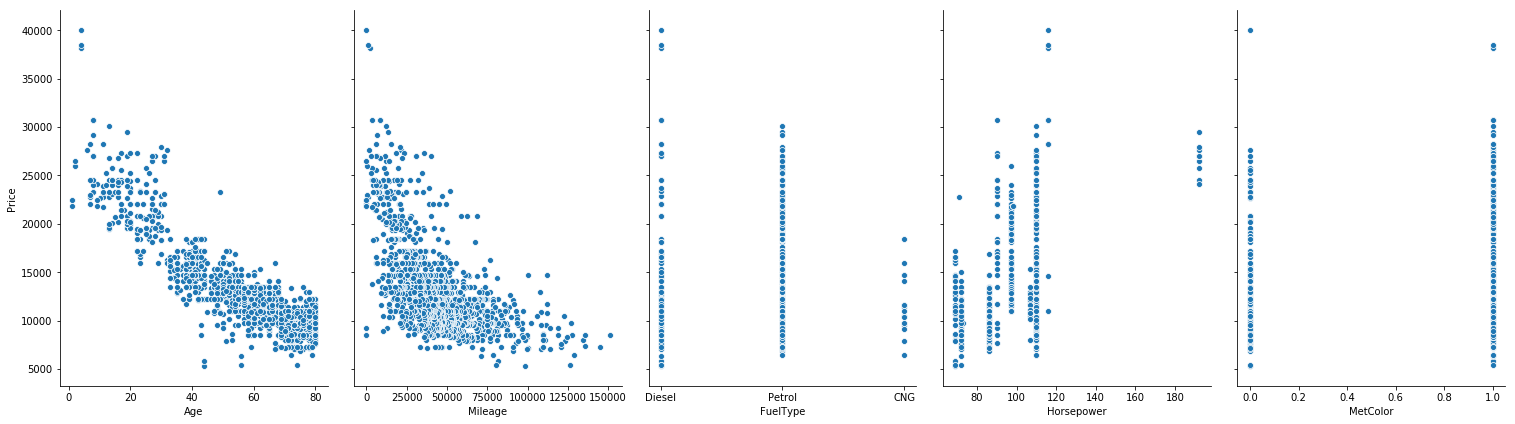

In [80]:
sns.pairplot(data,x_vars=['Age','Mileage','FuelType','Horsepower','MetColor'],y_vars='Price',height=6,aspect=0.7)

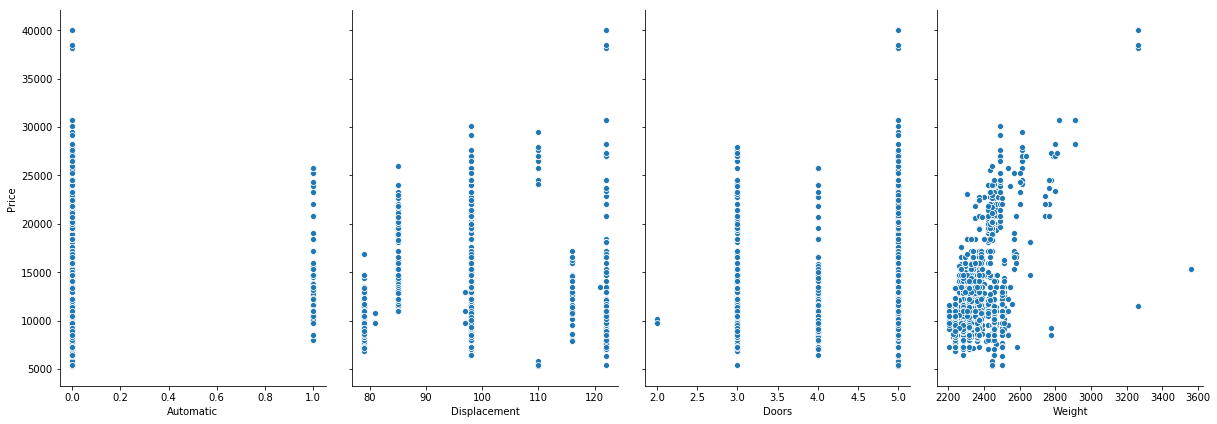

In [81]:
sns.pairplot(data,x_vars=['Automatic','Displacement','Doors','Weight'],y_vars='Price',height=6,aspect=0.7)

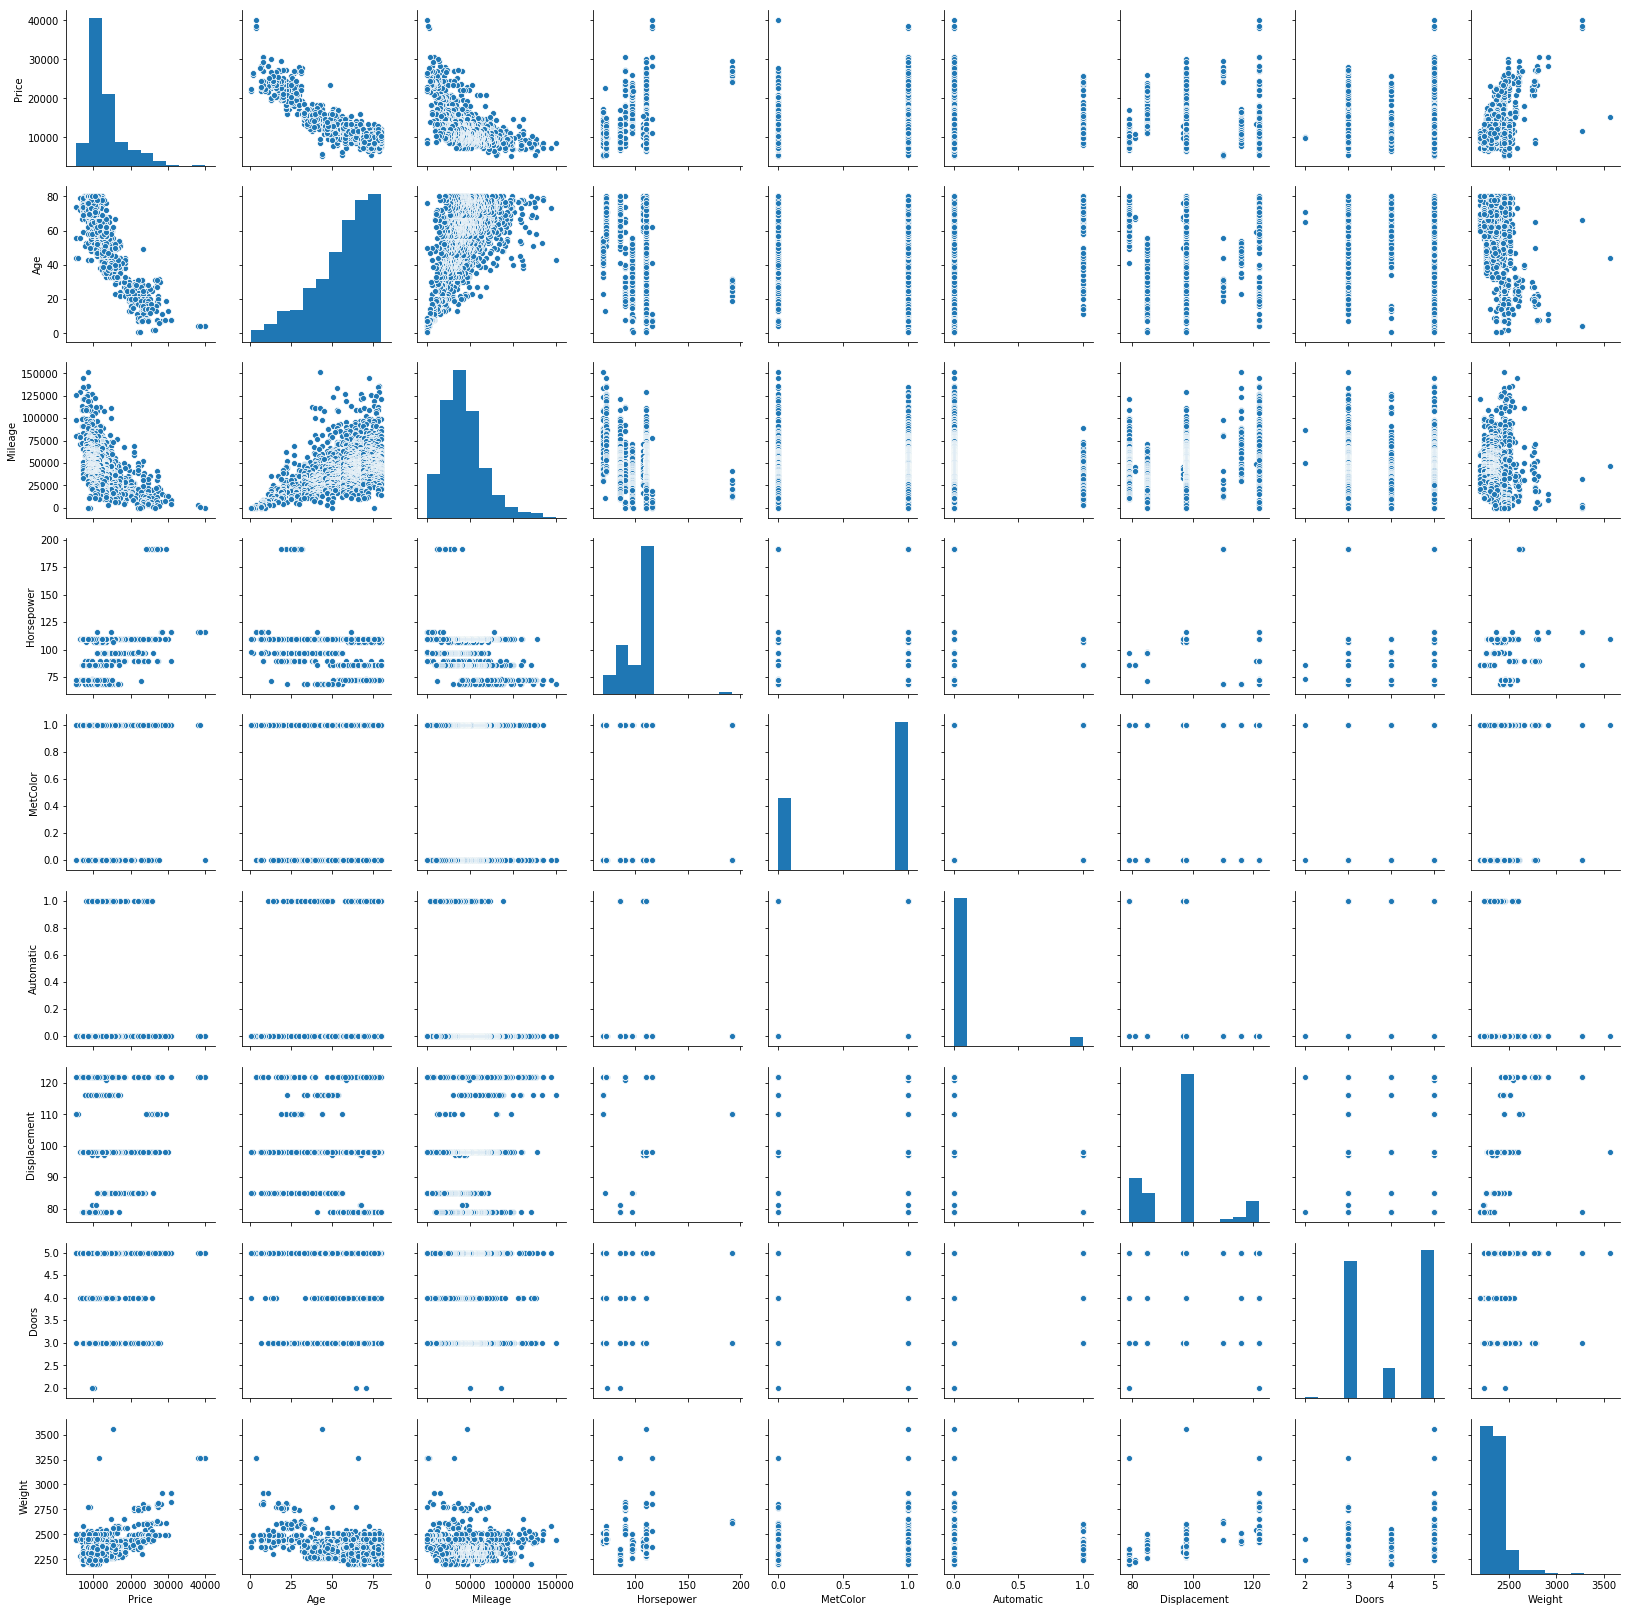

In [82]:
sns.pairplot(data)

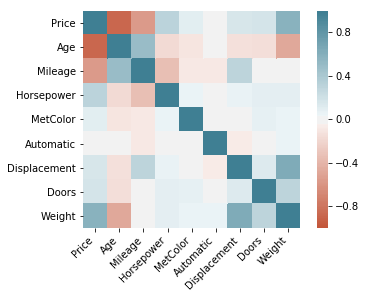

In [93]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [84]:
X= data[['Age']]
y= data['Price']

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
linreg= LinearRegression()

In [87]:
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
print(linreg.intercept_)
print(linreg.coef_)

24962.032812616955
[-210.24810952]


In [89]:
import statsmodels.api as sm
from scipy import stats
X_withConstant= sm.add_constant(X)
est= sm.OLS(y,X_withConstant)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Sat, 12 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:47:05   Log-Likelihood:                -13054.
No. Observations:                1436   AIC:                         2.611e+04
Df Residuals:                    1434   BIC:                         2.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.496e+04    179.699    138.910      0.0

C:\Users\17pri\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [90]:
y_pred = linreg.predict(X)

In [92]:
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

2146.128658159514
